## Модели классификации для нескольких классов

Ирисы Фишера - самый популярный в статистической литературе набор данных, часто используемый для иллюстрации работы различных алгоритмов классификации.

Выборка состоит из 150 экземпляров ирисов трех видов, для которых измерялись четыре характеристики: длина и ширина чашелистика (Sepal.Length и Sepal.Width), длина и ширина лепестка (Petal.Length и Petal.Width). В данной работе предстоит проанализировать данные и разбить их на кластеры. Для этого потребуется применить "обучение без учителя".

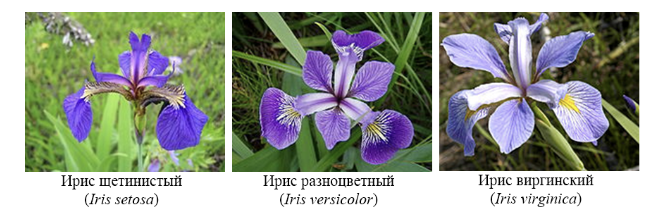

Импортируем необходимые библиотеки:

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering, SpectralClustering


import warnings
warnings.filterwarnings('ignore')

Библиотека Scikit-Learn предоставляет чистые датасеты, которые вы можете использовать при построении моделей машинного обучения. Они поставляются вместе с Scikit-Learn (https://scikit-learn.ru/7-1-toy-datasets/).

Набор данных Iris, классический набор данных в машинном обучении и статистике. Он входит в модуль datasets библиотеки scikit-learn и загрузить его можно, вызвав функцию load_iris().

In [111]:
from sklearn.datasets import load_iris
iris = load_iris()

In [112]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [113]:
print(iris.data[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [114]:
print(iris.target_names)
print(iris.target)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Набор данных состоит из длины/ширины двух типов лепестков Ириса: sepal и petal.

Целевая переменная — это сорт Ириса: 0 — Setosa, 1 — Versicolor, 2 — Virginica. 

Соответственно, наша задача — по имеющимся данным попробовать найти зависимости между размерами лепестков и сортами Ирисов.

In [115]:
type(iris)

sklearn.utils._bunch.Bunch

Объект Bunch — это словарь, который предоставляет свои ключи как атрибуты.

Формируем DataFrame:

In [116]:
iris_df = pd.DataFrame(iris.data)

In [117]:
iris_df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [118]:
# Делаем имена колонок такие же, как имена переменных:
iris_df.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_df['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_df['name'] = iris_df.target.apply(lambda x : iris.target_names[x])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [119]:
iris_df.shape

(150, 6)

In [120]:
# информация о наборе данных
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   name               150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [121]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [122]:
iris_df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [123]:
iris_df['name'].value_counts()

name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Кластериизация значений без масштабирования

*Определяем кол-во кластеров для метода K-means*

In [124]:
del iris_df['name']
X = iris_df.iloc[:, [0,1,2,3]].values

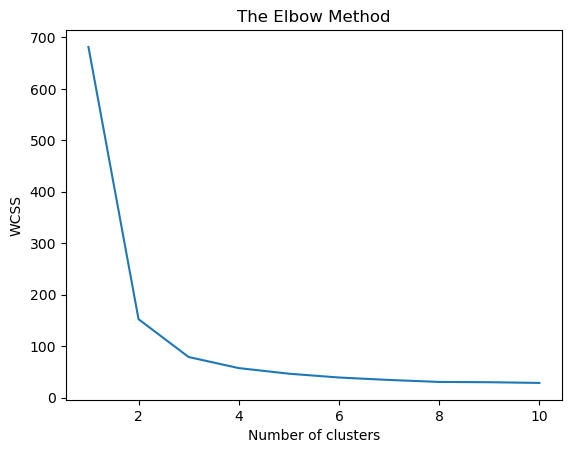

In [125]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

По графику оптимальное кол-во кластеров - 3

In [126]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=28)

In [127]:
kmeans.fit(X)

KMeans(n_clusters=3, n_init=28)

In [128]:
pred=kmeans.fit_predict(X)

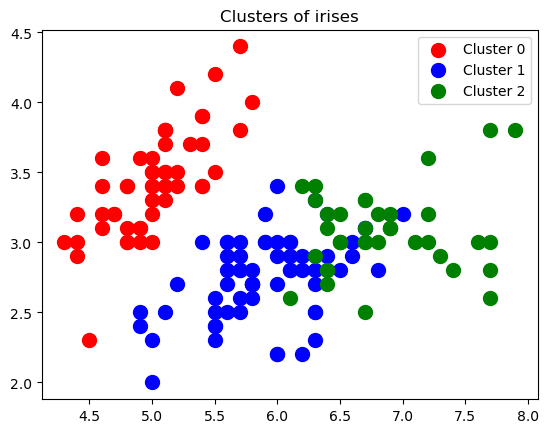

In [129]:
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], s = 100, c = 'green', label = 'Cluster 2')

plt.title('Clusters of irises')

plt.legend()
plt.show()

In [130]:
from sklearn import metrics

In [131]:
metrics.calinski_harabasz_score(X, kmeans.labels_)

561.62775662962

In [132]:
metrics.davies_bouldin_score(X, kmeans.labels_)

0.6619715465007497

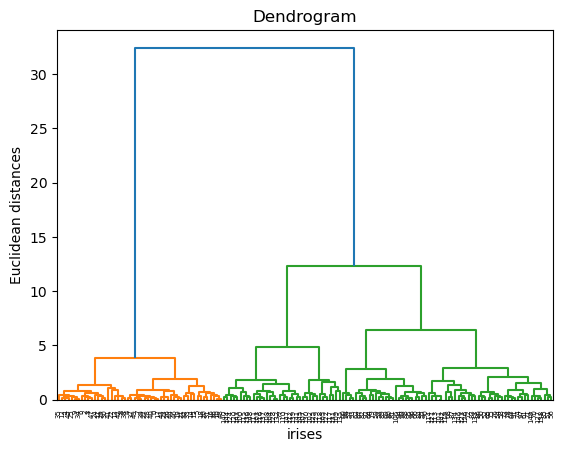

In [133]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('irises')
plt.ylabel('Euclidean distances')
plt.show()

In [134]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

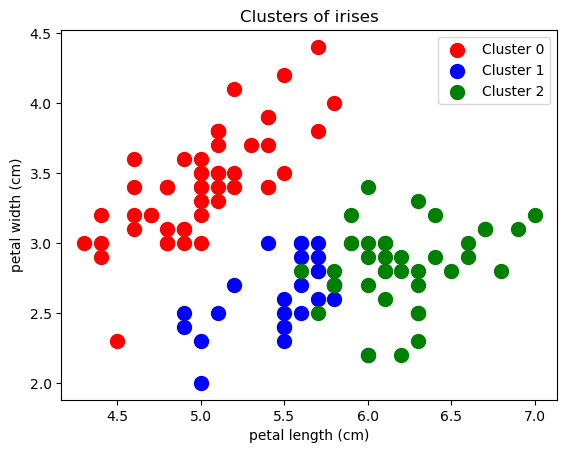

In [135]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 2')

plt.title('Clusters of irises')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

In [136]:
metrics.silhouette_score(X, y_hc)

0.48438258927905925

In [137]:
metrics.calinski_harabasz_score(X, y_hc)

488.4849040365162

In [138]:
metrics.davies_bouldin_score(X, kmeans.labels_)

0.6619715465007497

In [139]:
X = iris_df.iloc[:, [2, 3]].values
X = (X - X.mean(axis=0))/X.std(axis=0)

In [140]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(n_neighbors=20, algorithm='ball_tree', metric='haversine')

In [141]:
model.fit(X)
dist, _ = model.kneighbors(X, n_neighbors=20, return_distance=True)

In [142]:
dist = dist[:, -1]

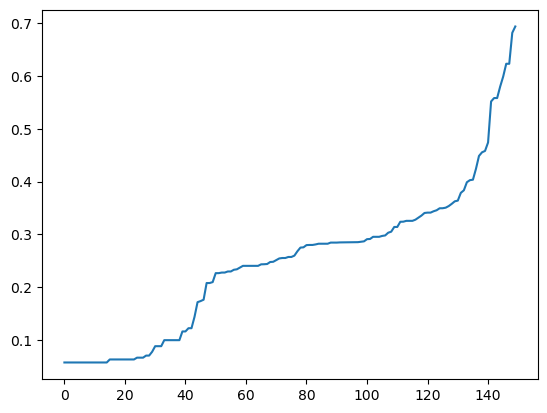

In [143]:
dist = np.sort(dist)
plt.plot(dist)

In [144]:
eps = 0.23

In [145]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=20, metric='haversine', algorithm='ball_tree')
dbscan.fit(X)

DBSCAN(algorithm='ball_tree', eps=0.23, metric='haversine', min_samples=20)

In [146]:
labels = dbscan.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

Text(0, 0.5, 'petal width (cm)')

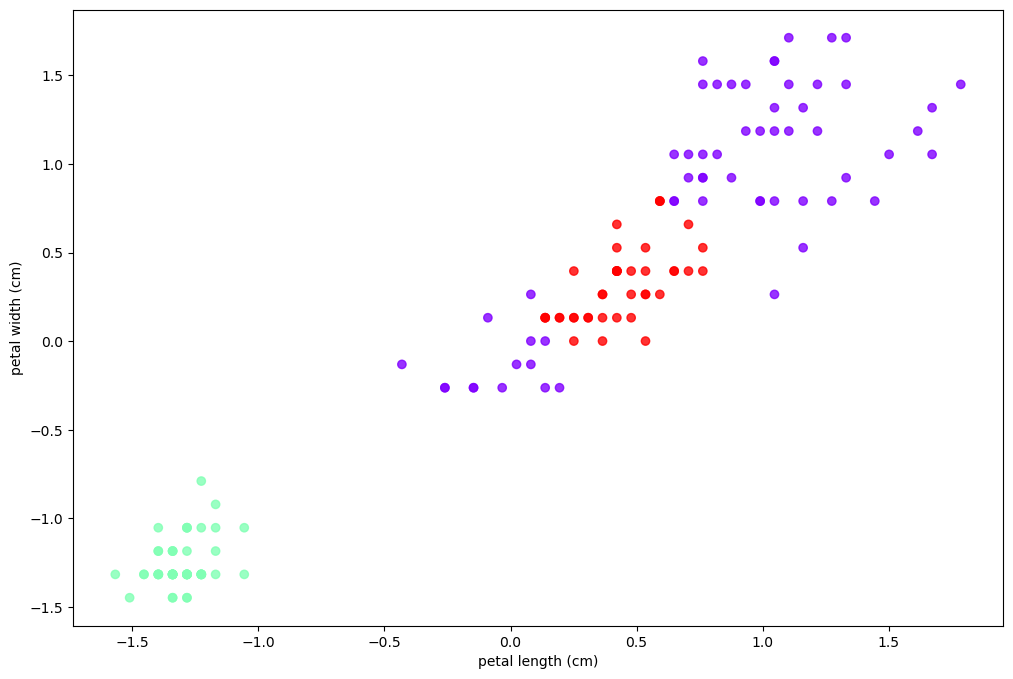

In [147]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],c=labels,cmap='rainbow', alpha=0.8)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [148]:
metrics.silhouette_score(X, labels)

0.4858333888377237

In [149]:
metrics.calinski_harabasz_score(X, labels)

422.04639689125145

In [150]:
metrics.davies_bouldin_score(X, kmeans.labels_)

0.5584343948019472

### Кластериизация значений c масштабированием

In [151]:
X = iris_df.iloc[:, [0,1,2,3]].values
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [152]:
y = iris_df.iloc[:, 4]
Xcol = iris_df.iloc[:, [0,1,2,3]].columns

In [153]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X=pd.DataFrame(mms.fit_transform(X), columns=Xcol)

### Метод главных компонент

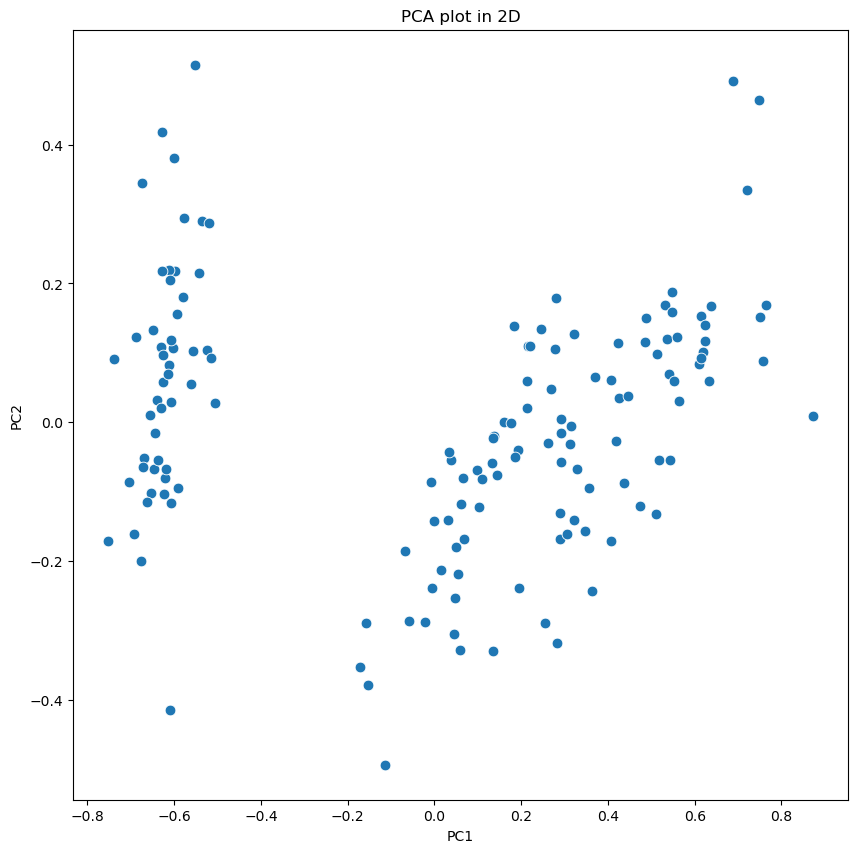

In [154]:
principal_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(X))
    
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                s=60)

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

In [155]:
def TSNEplot(pred=None):    
    tsne = TSNE(random_state=1)

    X_tsne = tsne.fit_transform(X)

    plt.figure(figsize=(12, 10))
    plt.scatter(X_tsne[:, 0], 
                X_tsne[:, 1], 
                c = pred, 
                edgecolor="none", 
                alpha=0.7, s=40,
        cmap=plt.cm.get_cmap("flare", 3))

    plt.colorbar()
    plt.title("t-SNE projection");

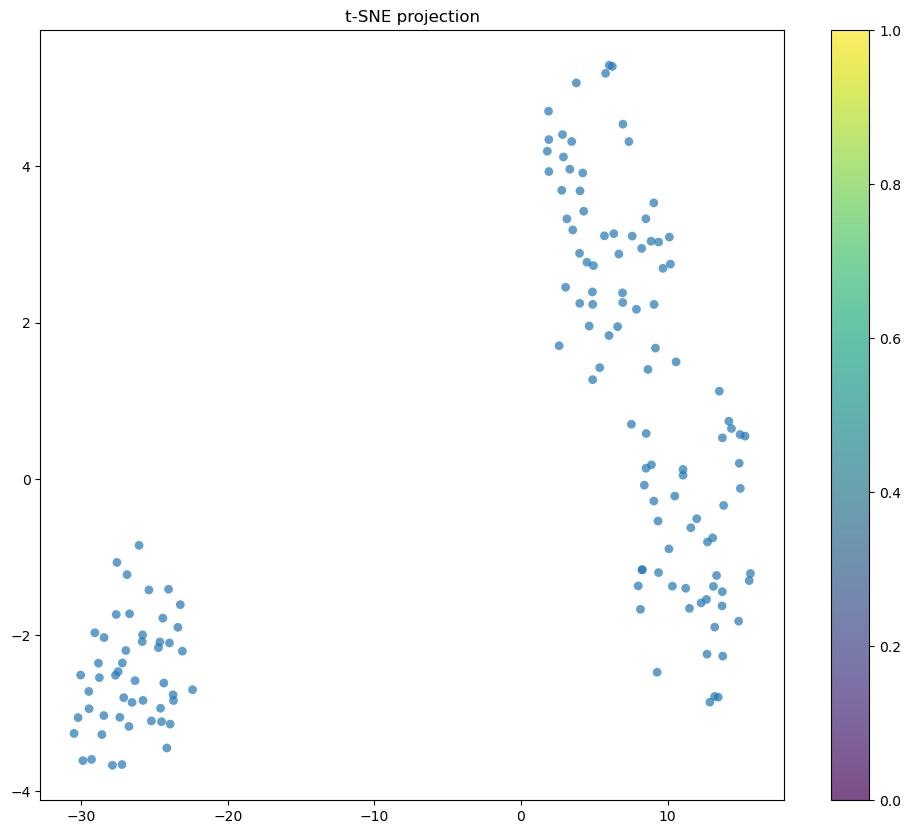

In [156]:
TSNEplot()

In [157]:
def PCAplot3D(x_data, y_data=None):
    components = PCA(n_components=3).fit_transform(x_data)

    fig = px.scatter_3d(
        components, 
        x=0, y=1, z=2, 
        color=y_data, 
        size=0.1*np.ones(len(X)), 
        opacity = 1,
        title='PCA plot in 3D',
        labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
        width=900, height=900
    )
    fig.show()

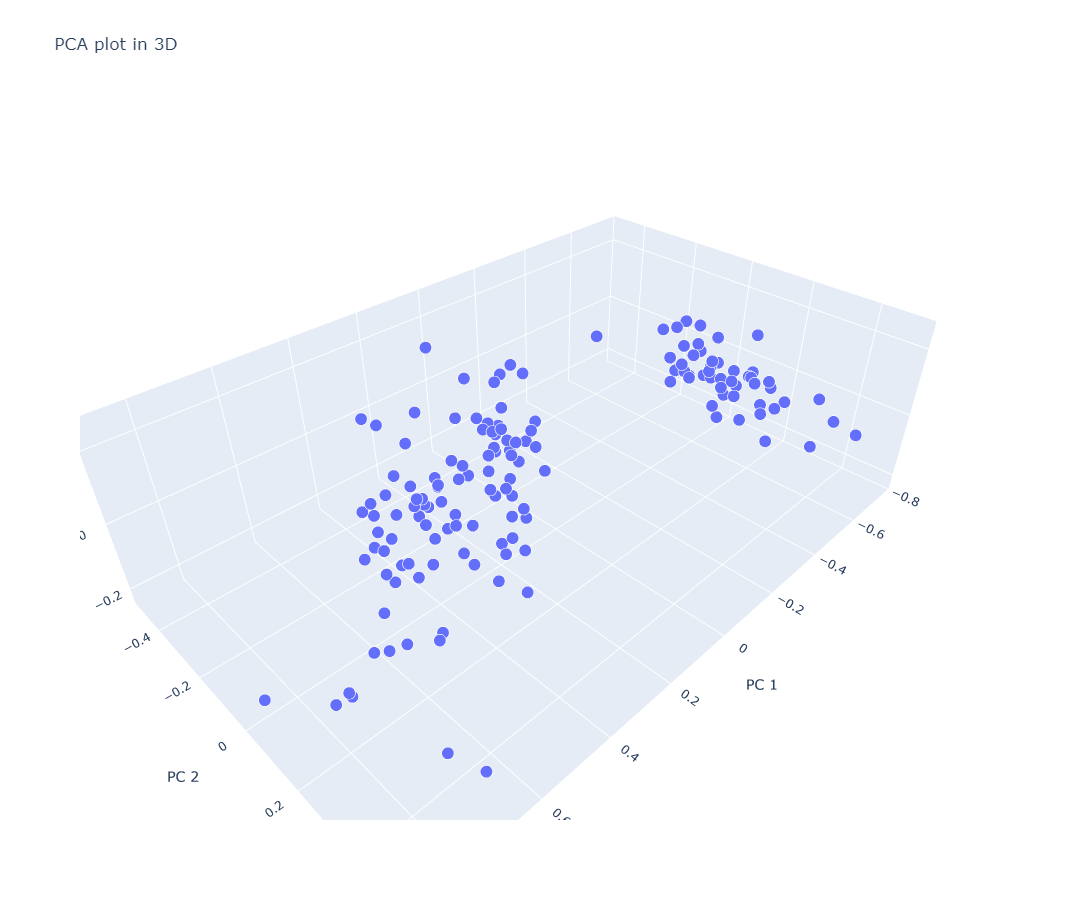

In [158]:
PCAplot3D(X)

# K-Means

In [159]:
pca = PCA(n_components=2)

kmeans = KMeans(n_clusters=3, random_state=1, n_init='auto').fit(X)
centroids_pca = pca.fit_transform(kmeans.cluster_centers_)
pred_k = kmeans.labels_

principal_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(X))

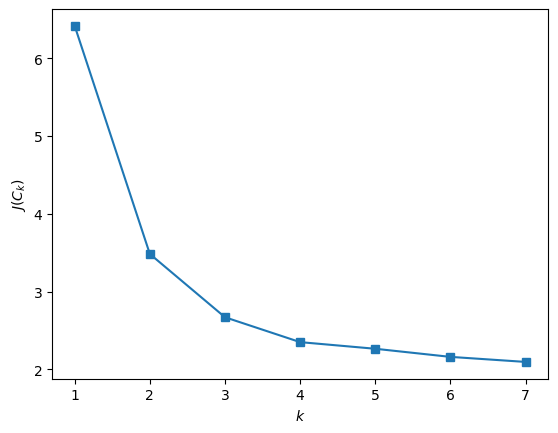

In [160]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init='auto').fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
    
plt.plot(range(1, 8), inertia, marker="s")
plt.xlabel("$k$")
plt.ylabel("$J(C_k)$");

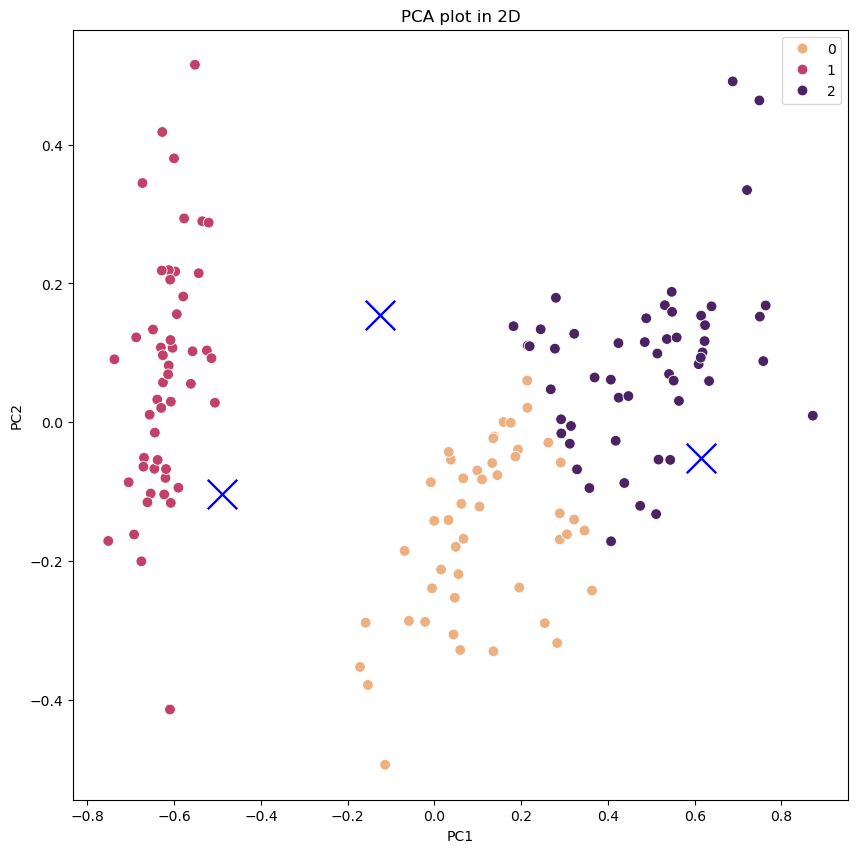

In [161]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = pred_k, 
                palette="flare", 
                s=60)
sns.scatterplot(x = centroids_pca[:,0], 
                y =  centroids_pca[:,1],  
                marker="x", 
                s=450, 
                color = 'blue')
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

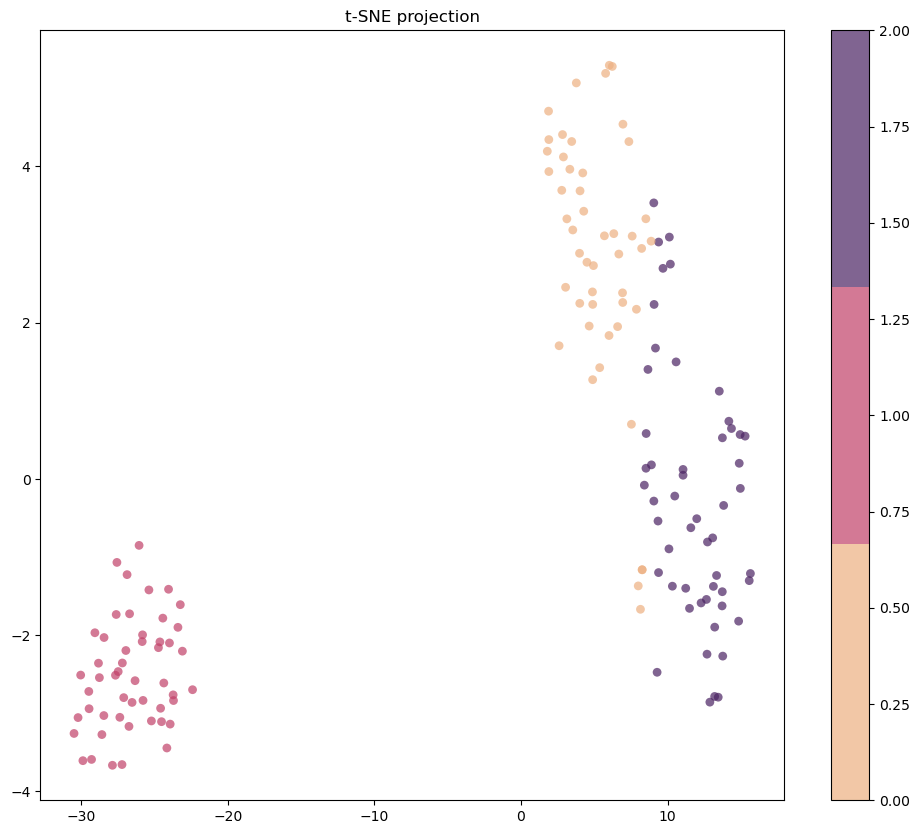

In [162]:
TSNEplot(pred_k)

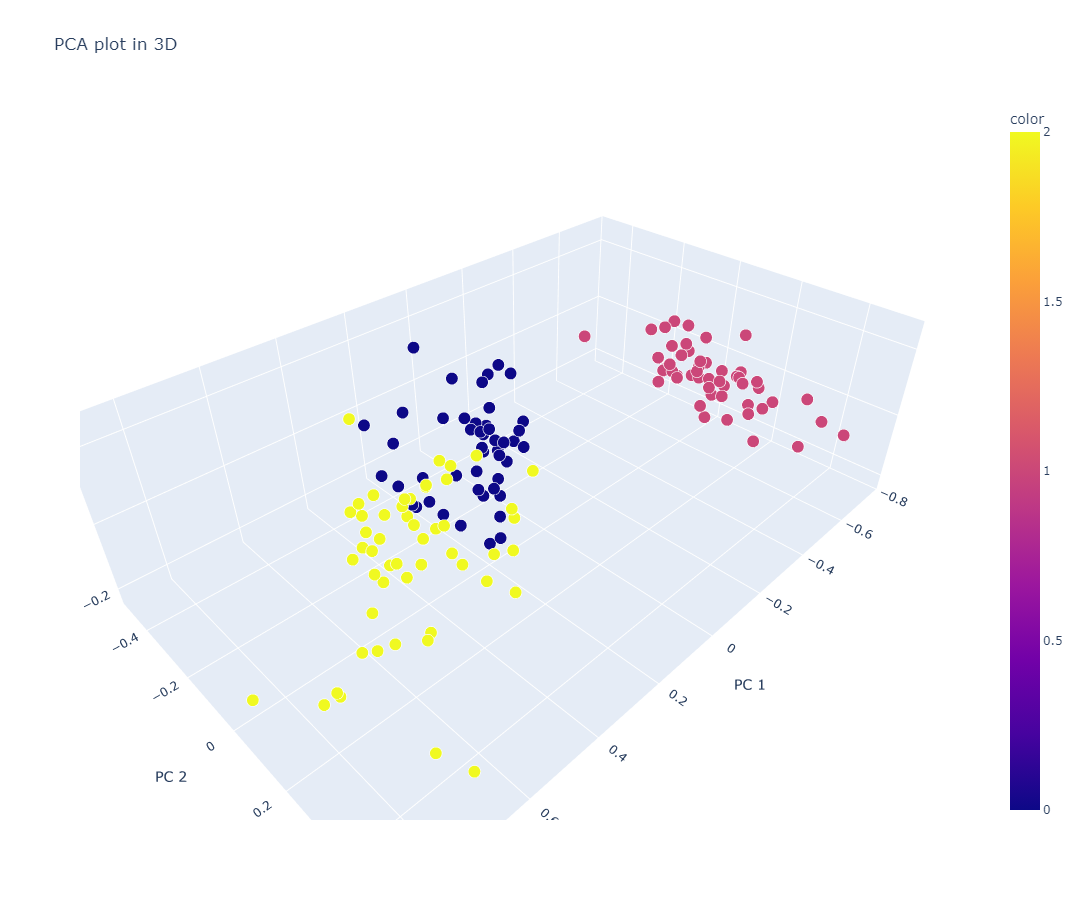

In [163]:
PCAplot3D(X, pred_k)

# Agglomerative Clustering by Ward

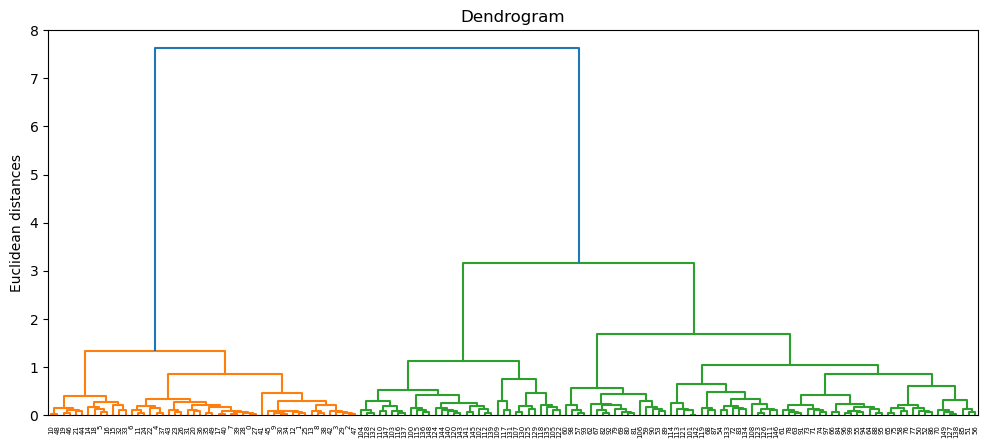

In [164]:
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot
pyplot.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

In [165]:
clustering_ward = AgglomerativeClustering(3).fit(X)
pred_ward = clustering_ward.labels_

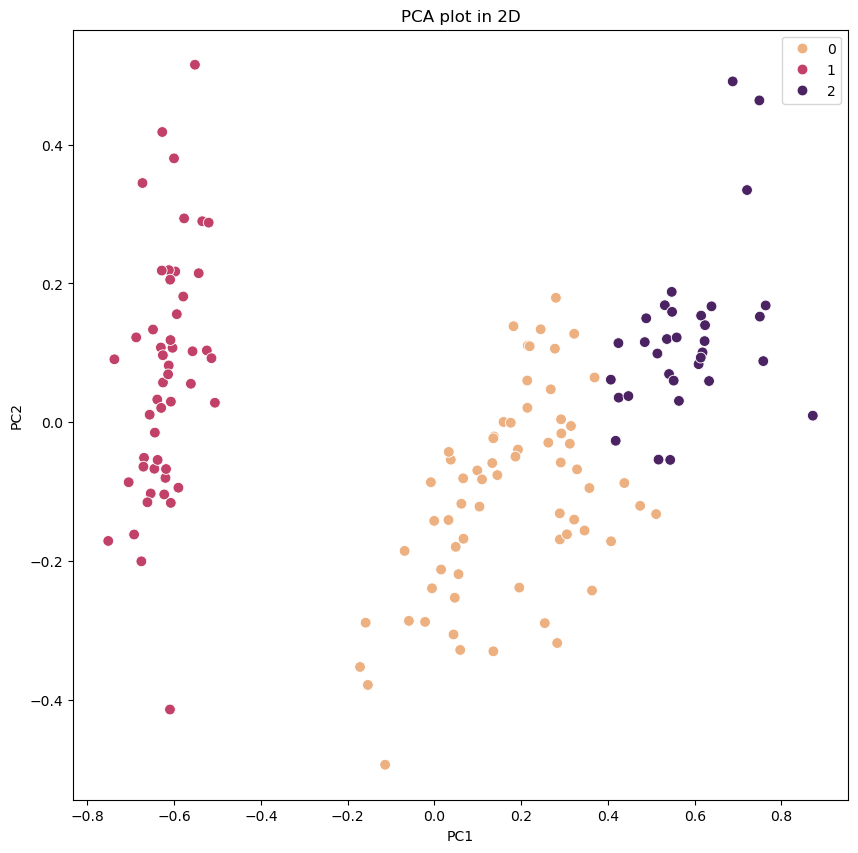

In [166]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = pred_ward, 
                palette="flare", 
                s=60)
plt.title('PCA plot in 2D')
plt.xlabel('PC1');
plt.ylabel('PC2');

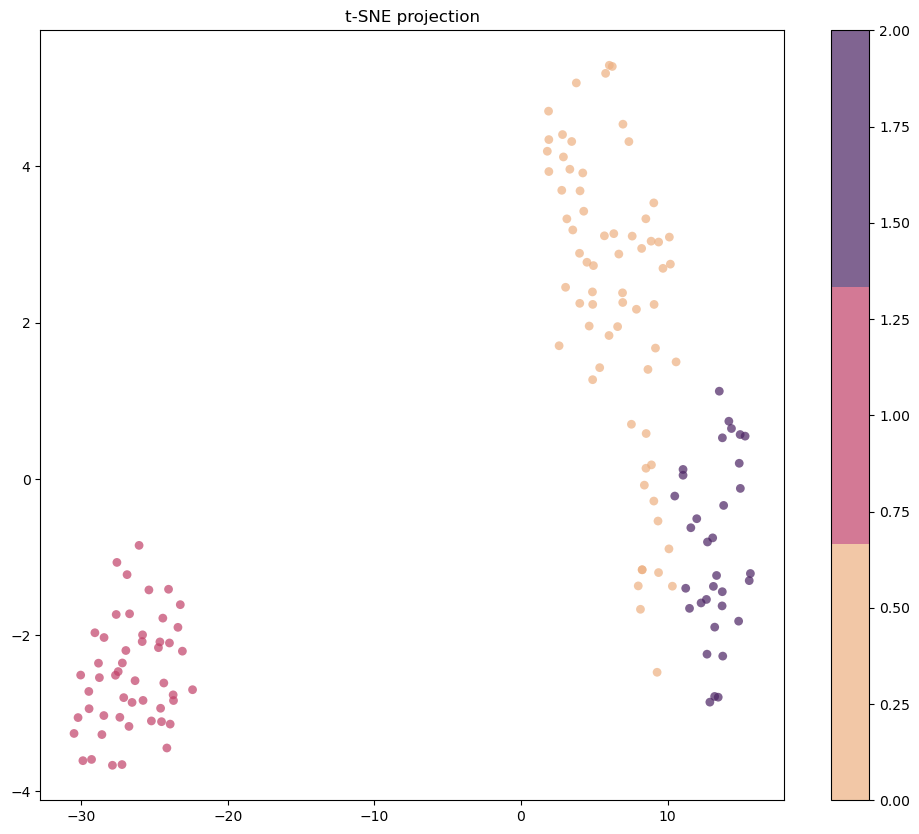

In [167]:
TSNEplot(pred_ward)

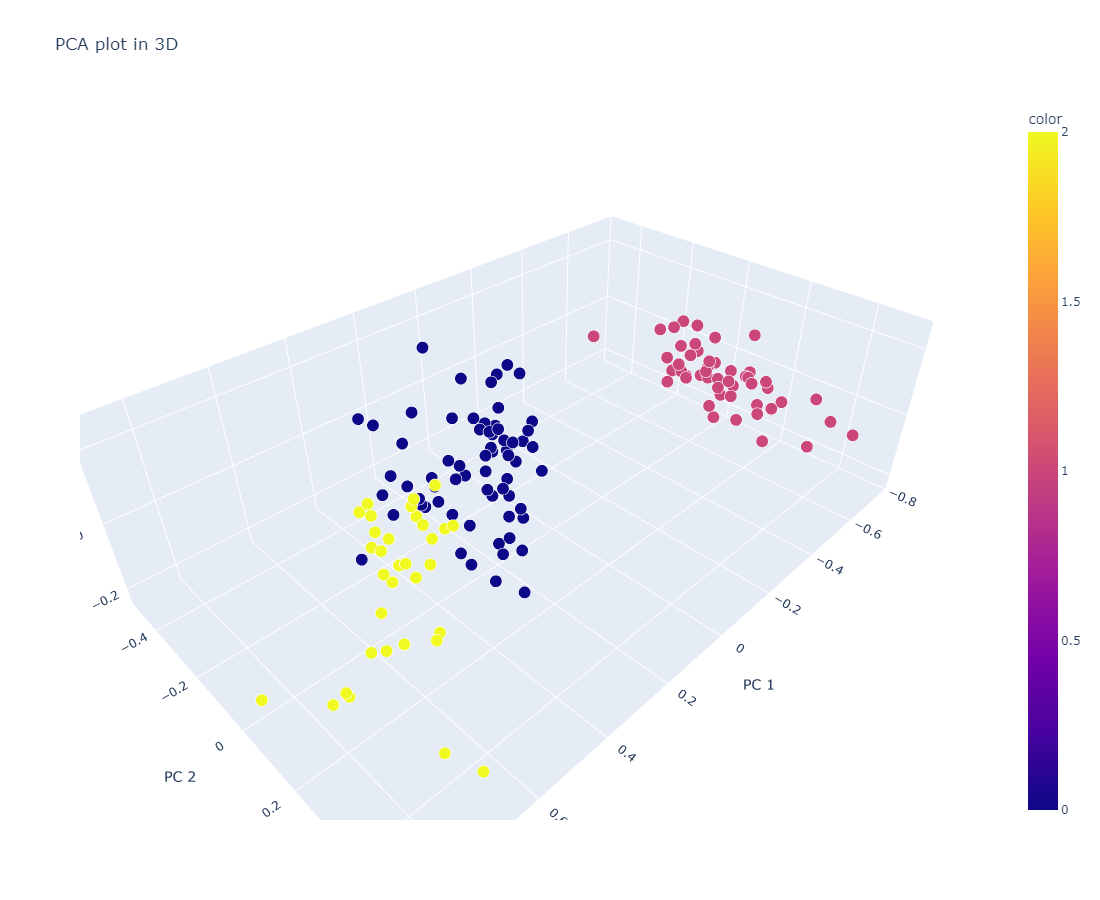

In [168]:
PCAplot3D(X, pred_ward)

# Spectral Clustering

In [169]:
clustering_sp = SpectralClustering(3).fit(X)
pred_sp = clustering_sp.labels_

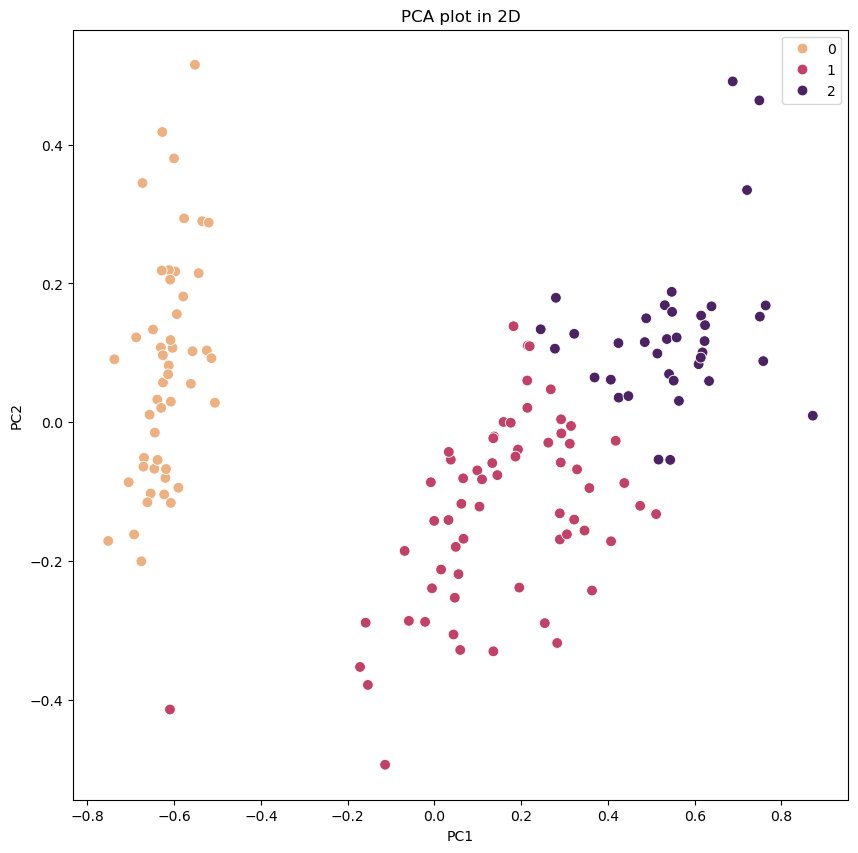

In [170]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = pred_sp, 
                palette="flare", 
                s=60)
plt.title('PCA plot in 2D')
plt.xlabel('PC1');
plt.ylabel('PC2');

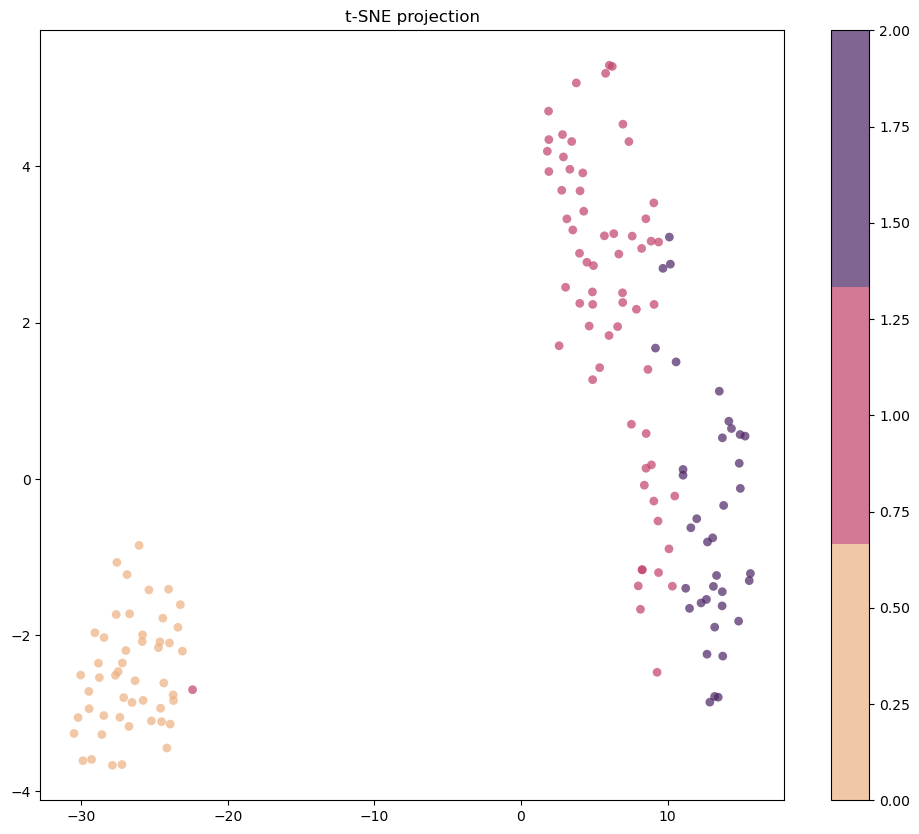

In [171]:
TSNEplot(pred_sp)

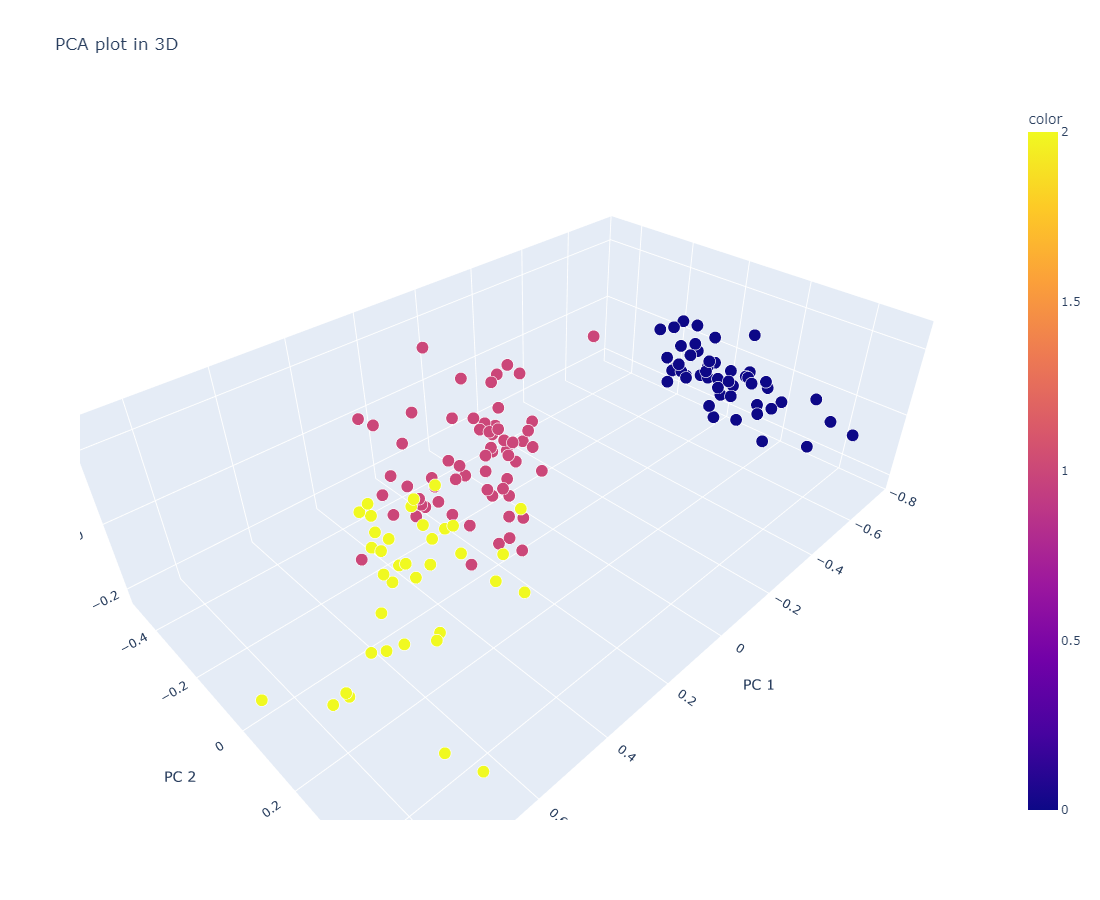

In [172]:
PCAplot3D(X, pred_sp)

# RandScore

In [173]:
rs_k = rand_score(kmeans.labels_, y) 
rs_ward = rand_score(pred_ward, y)
rs_sp = rand_score(pred_sp, y)

print('\nK-Means')
print('_'*50 + '\n')
print(" rand_score = {} \n {} из 150 предсказано верно \n\n".format(rs_k, rs_k * 150))


print('Agglomerative Clustering')
print('_'*50 + '\n')
print(" rand_score = {} \n {} из 150 предсказано верно \n\n".format(rs_ward, rs_ward * 150))


print('Spectral Clustering')
print('_'*50 + '\n')
print(" rand_score = {} \n {} из 150 предсказано верно \n".format(rs_sp, rs_sp * 150))


K-Means
__________________________________________________

 rand_score = 0.84 
 126.0 из 150 предсказано верно 


Agglomerative Clustering
__________________________________________________

 rand_score = 0.8737360178970918 
 131.06040268456377 из 150 предсказано верно 


Spectral Clustering
__________________________________________________

 rand_score = 0.8314988814317673 
 124.7248322147651 из 150 предсказано верно 



### Просматриваем выделенные классы:

In [174]:
iris_df['class'] = pd.Series(pred_k)

In [175]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000,1.026667
std,0.828066,0.435866,1.765298,0.762238,0.819232,0.818795
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000,2.000000


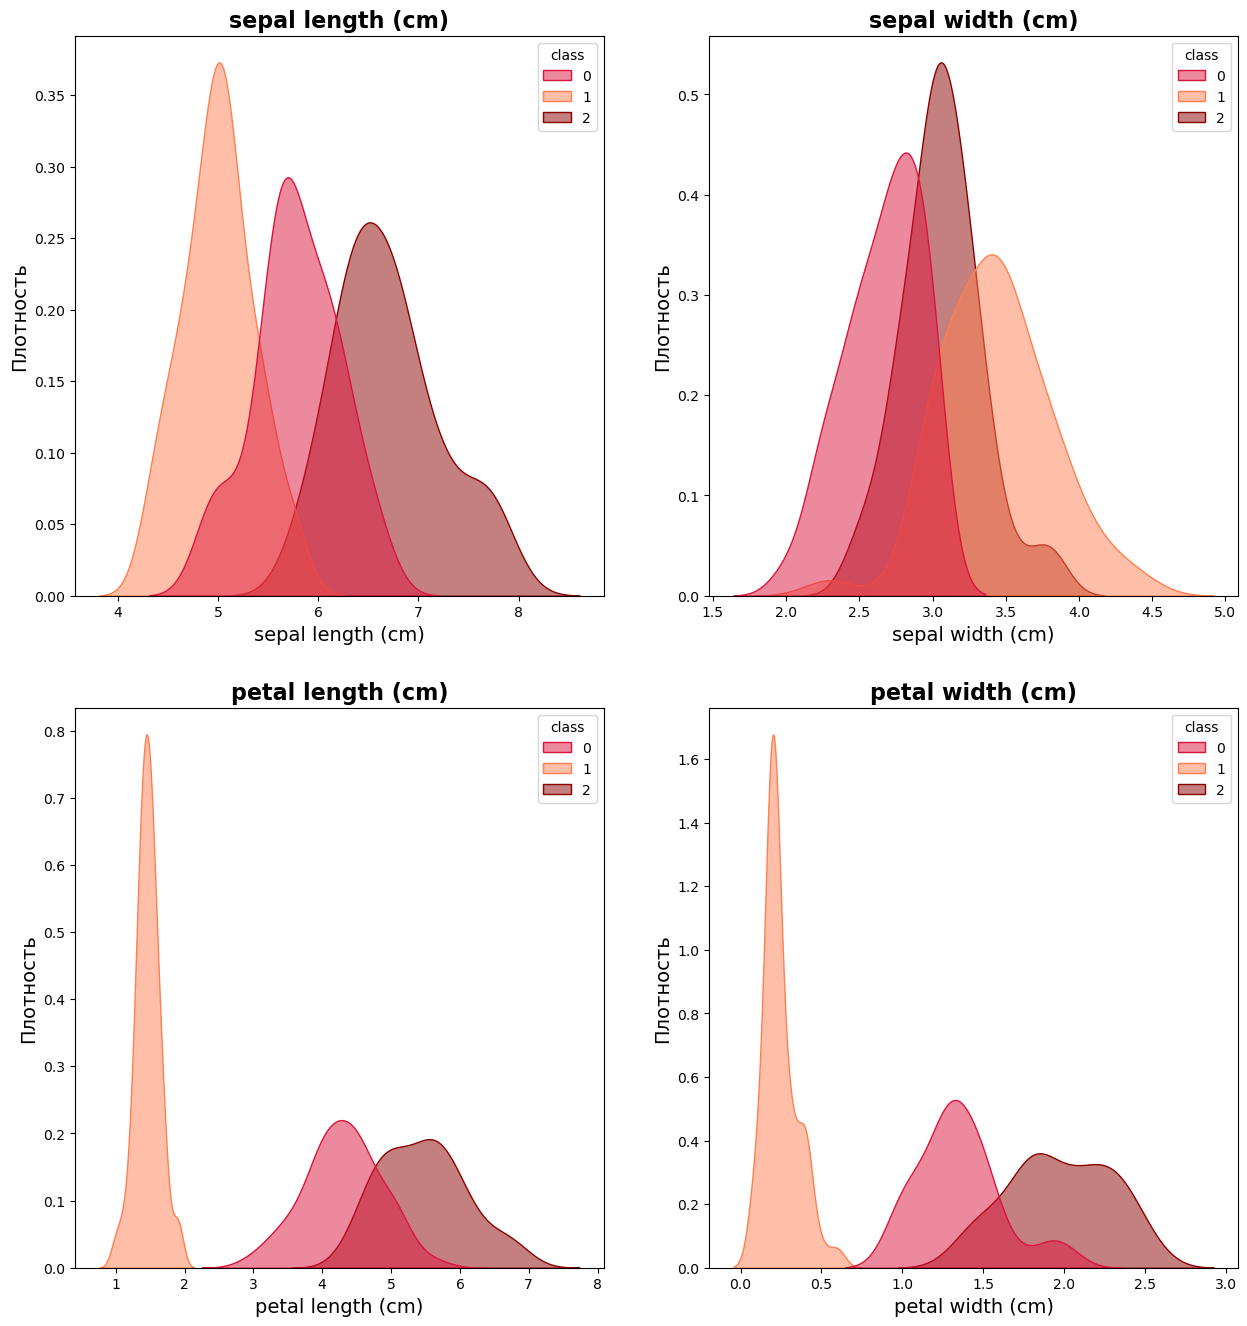

In [184]:
fig, axes = plt.subplots(2,2, figsize = (15,16))

# Расстояние между графиками
plt.subplots_adjust(hspace=0.2)

# Список значений признаков для цикла
columns = iris_df.columns[[0, 1, 2, 3]]

# Строим распределения (kdeplot) для каждого признака
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data = iris_df,
                palette = ['#DC143C','#FF7F50','#8B0000'],
                x = column,
                fill = True,
                alpha = 0.5,
                hue = 'class',
                ax = ax)
    
    ax.set_title(column, fontweight = 'bold', fontsize = 16)
    ax.set_xlabel(column, fontsize = 14)
    ax.set_ylabel('Плотность', fontsize = 14)
    

plt.show()

Кластеризация метода `Agglomerative`, по сравнению, лучше чем у `Spectral` и `K-Means`. Все они определили 3 кластера.
Каждый кластер имеет свои особенности.
Характеристика кластеров по признакам:
1. Sepal Length (длина чашелистика):
   - Класс 0: Значения сосредоточены в диапазоне от 4.5 до 5.5 см, с пиком около 5 см.
   - Класс 1: Значения распределены в диапазоне от 5.5 до 7 см, с пиком около 6 см.
   - Класс 2: Значения варьируются от 6 до 8 см, с пиком около 6.5-7 см.
3. Sepal Width (ширина чашелистика):
   - Класс 0: Значения сосредоточены в диапазоне от 2.5 до 4 см, с пиком около 3.5 см.
   - Класс 1: Значения распределены в диапазоне от 2.5 до 3.5 см, с пиком около 3 см.
   - Класс 2: Значения варьируются от 2.5 до 3.5 см, с пиком около 3 см.
4. Petal Length (длина лепестка):
   - Класс 0: Значения сосредоточены в диапазоне от 1 до 2 см, с пиком около 1.5 см.
   - Класс 1: Значения распределены в диапазоне от 3 до 5 см, с пиком около 4 см.
   - Класс 2: Значения варьируются от 4.5 до 7 см, с пиком около 5.5 см.
5. Petal Width (ширина лепестка):
   - Класс 0: Значения сосредоточены в диапазоне от 0 до 0.5 см, с пиком около 0.2 см.
   - Класс 1: Значения распределены в диапазоне от 1 до 1.5 см, с пиком около 1.2 см.
   - Класс 2: Значения варьируются от 1.5 до 2.5 см, с пиком около 2 см.<br>
<b>Общие выводы:</b>
   - Класс 0: Характеризуется меньшими значениями всех признаков (короткие и узкие чашелистики и лепестки).
   - Класс 1: Имеет средние значения признаков, особенно заметно по длине и ширине лепестков.
   - Класс 2: Характеризуется наибольшими значениями всех признаков (длинные и широкие чашелистики и лепестки).

### Описательная статистика

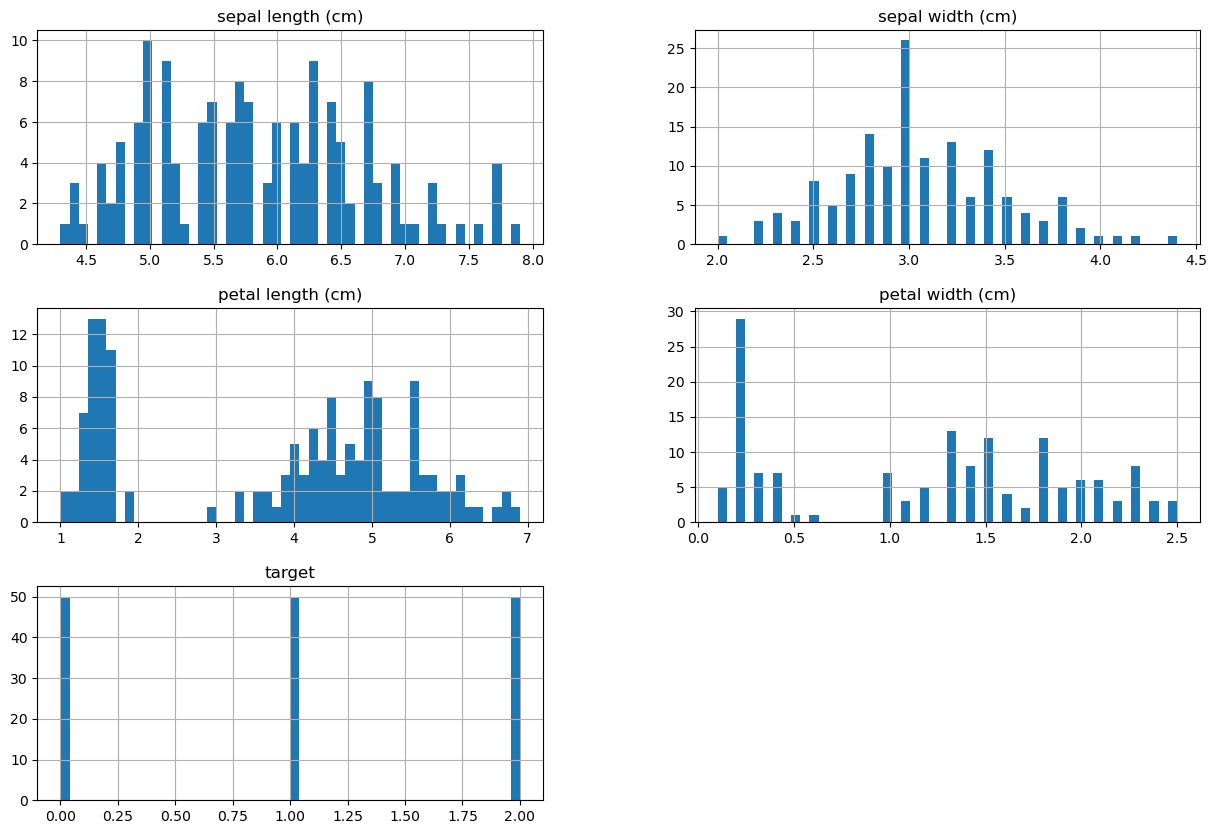

In [16]:
iris_df.hist(figsize = (15,10), bins = 50);

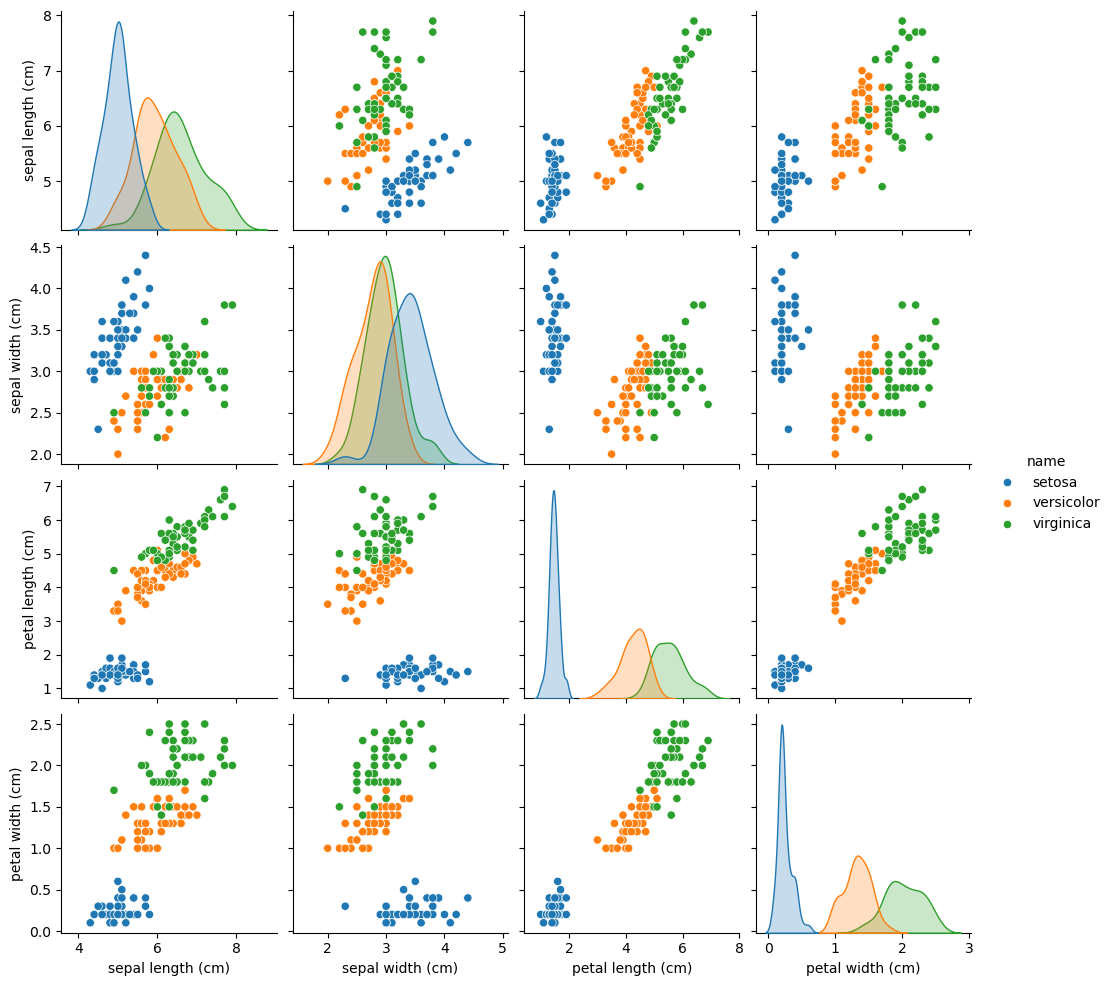

In [17]:
sns.pairplot(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

Видно, что «petal width (cm)» и «petal length (cm)» имеют сильную зависимость — точки вытянуты вдоль одной линии. И в принципе по этим же признакам можно строить классификацию, т.к. точки по цвету сгруппированы достаточно компактно. А вот, например, с помощью переменных «sepal width (cm)» и «sepal length (cm)» качественную классификацию не построить, т.к. точки, относящиеся к сортам Versicolor и Virginica, перемешаны между собой.

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

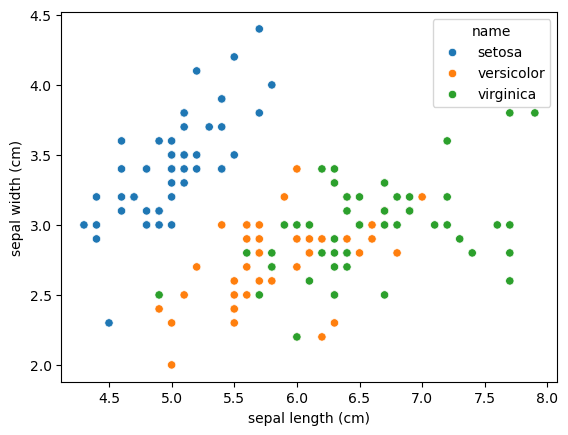

In [18]:
sns.scatterplot(data=iris_df, x="sepal length (cm)", y="sepal width (cm)", hue="name")

In [19]:
corr = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<Axes: >

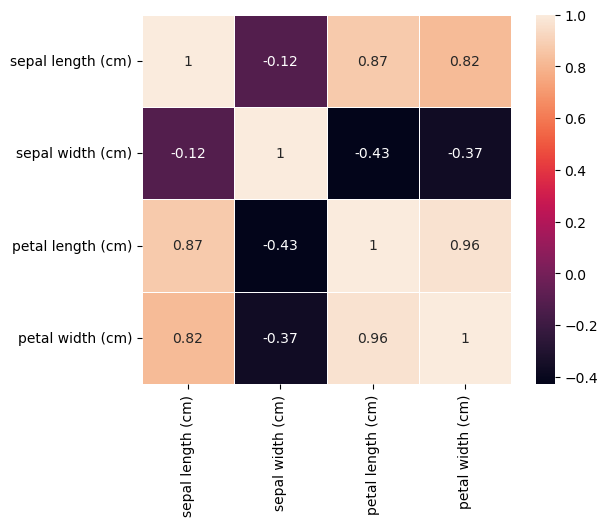

In [20]:
sns.heatmap(corr, square=True, annot=True, linewidths=.5)

Действительно видим, что между переменными «petal length (cm)» и «petal width (cm)» выявлена очень сильная зависимость 0.96, а между «sepal width (cm)» и «sepal length (cm)» - слабая корреляция.

### Обучение классификатора

### KNeigborsClassifier

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], 
                                                      iris_df['target'], 
                                                      test_size=0.3, 
                                                      random_state=19)

In [139]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [140]:
# Обучаем модель на обучающей выборке
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [141]:
y_pred = knn.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2,
       2])

In [142]:
# Другой способ для вычисления метрики
from sklearn.metrics import accuracy_score
knn_ac = accuracy_score(y_test, y_pred)
knn_ac

0.9333333333333333

In [143]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.94      0.91        16
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.94        45
weighted avg       0.93      0.93      0.93        45



In [144]:
knn_recall = recall_score(y_test, y_pred, average='macro')
knn_f1 = f1_score(y_test, y_pred, average='macro')

### Confusion Matrix

In [145]:
from sklearn.metrics import confusion_matrix

In [146]:
conf_matrix = confusion_matrix(y_test, y_pred)

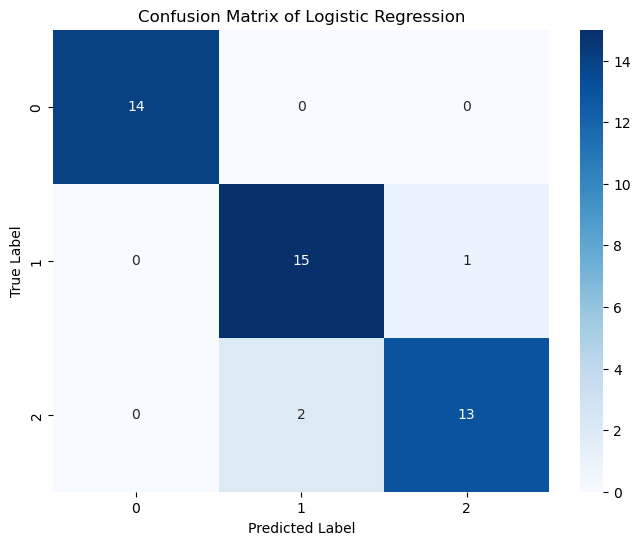

In [147]:
Y = iris_df['target']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

### Метрики многоклассовой классификации

1) Микро-усреднение (micro-averaging) является эквивалентом accuracy и подходит __при сбалансированных классах__. Элементы consufion matrix усредняются между бинарными прогнозами для каждого класса, после чего метрики рассчитываются на полученной матрице. На примере Precision и Recall это выглядит следующим образом:

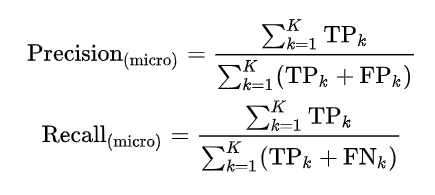

In [148]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [149]:
print(precision_score(y_test, y_pred, average='micro'))
print(recall_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='micro'))

0.9333333333333333
0.9333333333333333
0.9333333333333333


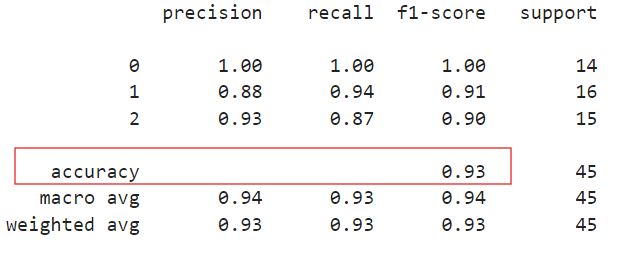

2) Макро-усреднение (macro-averaging) представляет собой среднее арифметическое подсчитанной метрики для каждого класса и используется __при дисбалансе классов, когда важен каждый класс__. В таком случае все классы учитываются равномерно независимо от их размера.

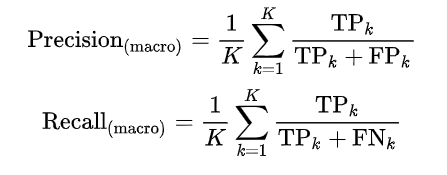

In [150]:
knn_precision = precision_score(y_test, y_pred, average='macro')
print(knn_precision)
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

0.9369747899159663
0.9347222222222222
0.9352142110762801


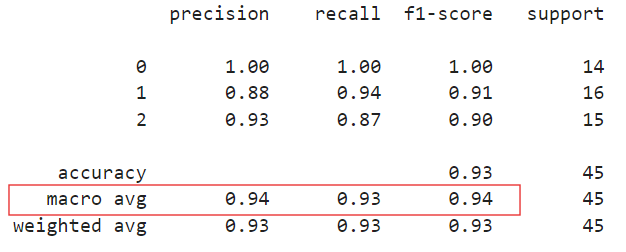

3) Взвешенное усреднение (weighted averaging) рассчитывается как взвешенное среднее и также применяется в случае __дисбаланса классов__, но только когда важность класса учитывается в зависимости от количества объектов с таким классом, то есть __когда важны наибольшие классы__. При таком подходе важность каждого класса учитывается с присвоением им весов. Вес класса w_k может устанавливаться по-разному, например, как доля примеров этого класса в обучающей выборке:

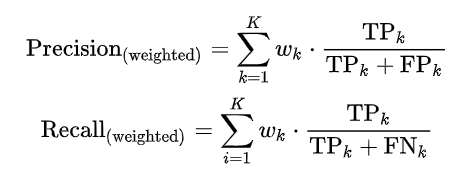

In [151]:
print(precision_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average='weighted'))

0.9343604108309991
0.9333333333333333
0.9331940090560781


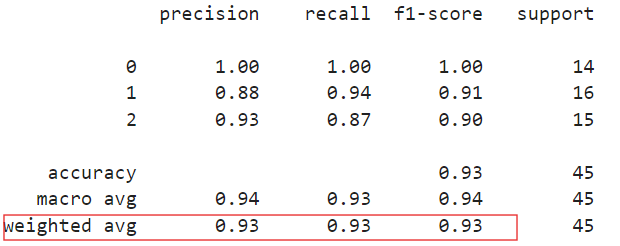

### Кроссвалидация

In [152]:
X = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']] 
                                                    

In [153]:
y = iris_df['target']

In [154]:
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve

In [155]:
# Cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5)
print('Cross-validation scores: ', cv_scores)
print('Mean cross-validation score: ', np.mean(cv_scores))

Cross-validation scores:  [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Mean cross-validation score:  0.96


### Настройка гиперпараметров

In [156]:
# Hyperparameter tuning
param_grid = {'n_neighbors': [1,2,3,4,5]}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'n_neighbors': 3}


In [157]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [158]:
y_pred = knn.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2,
       2])

In [159]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.94      0.91        16
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.94        45
weighted avg       0.93      0.93      0.93        45



In [160]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [161]:
y_pred = knn.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2,
       2])

In [162]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## Gaussian Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [46]:
gnb.fit(X_train, y_train)

GaussianNB()

In [47]:
y_pred = gnb.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2,
       2])

In [48]:
gnb_ac = accuracy_score(y_test, y_pred)
gnb_precision = precision_score(y_test, y_pred, average='macro')
gnb_recall = recall_score(y_test, y_pred, average='macro')
gnb_f1 = f1_score(y_test, y_pred, average='macro')

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.84      1.00      0.91        16
           2       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.95      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



### Confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
conf_matrix = confusion_matrix(y_test, y_pred)

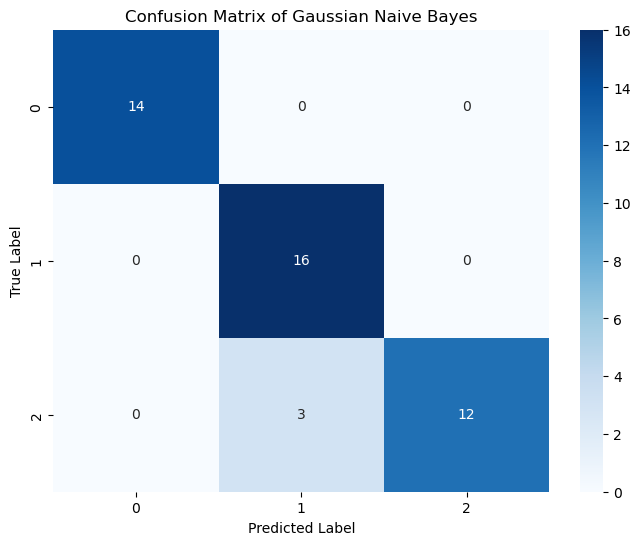

In [53]:
Y = iris_df['target']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Gaussian Naive Bayes')
plt.show()

In [54]:
print(precision_score(y_test, y_pred, average='micro'))
print(recall_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='micro'))

0.9333333333333333
0.9333333333333333
0.9333333333333333


In [55]:
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

0.9473684210526315
0.9333333333333332
0.9343915343915343


In [56]:
print(precision_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average='weighted'))

0.943859649122807
0.9333333333333333
0.9324867724867725


### Кроссвалидация

In [58]:
X = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']] 

In [59]:
y = iris_df['target']

In [60]:
cv_scores = cross_val_score(knn, X, y, cv=5)
print('Cross-validation scores: ', cv_scores)
print('Mean cross-validation score: ', np.mean(cv_scores))

Cross-validation scores:  [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean cross-validation score:  0.9733333333333334


## Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [62]:
%%time
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

CPU times: total: 141 ms
Wall time: 50 ms


LogisticRegression(random_state=42)

In [63]:
y_pred = lr.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2,
       2])

In [64]:
lr_ac = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred, average='macro')
lr_recall = recall_score(y_test, y_pred, average='macro')
lr_f1 = f1_score(y_test, y_pred, average='macro')

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.84      1.00      0.91        16
           2       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.95      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [67]:
conf_matrix = confusion_matrix(y_test, y_pred)

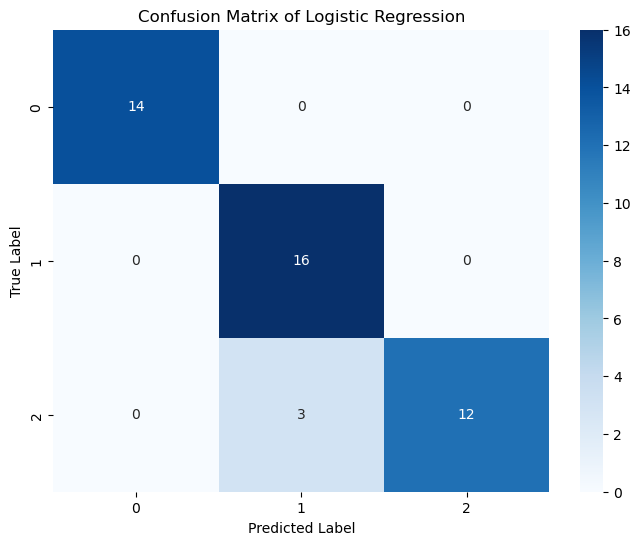

In [68]:
Y = iris_df['target']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

In [78]:
print(precision_score(y_test, y_pred, average='micro'))
print(recall_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='micro'))

0.9333333333333333
0.9333333333333333
0.9333333333333333


In [79]:
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

0.9473684210526315
0.9333333333333332
0.9343915343915343


In [80]:
print(precision_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average='weighted'))

0.943859649122807
0.9333333333333333
0.9324867724867725


### Кроссвалидация

In [81]:
cv_scores = cross_val_score(lr, X, y, cv=5)
print('Cross-validation scores: ', cv_scores)
print('Mean cross-validation score: ', np.mean(cv_scores))

Cross-validation scores:  [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean cross-validation score:  0.9733333333333334


### Настройка гиперпараметров

In [84]:
param_grid = {'random_state': [1, 2, 3, 4, 5]}

lr = LogisticRegression()

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'random_state': 1}


In [85]:
lr = LogisticRegression(random_state = 1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.84      1.00      0.91        16
           2       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.95      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



## Random Forest Classifier

In [91]:
from sklearn.ensemble import RandomForestClassifier
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [92]:
y_pred = rfc.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2,
       2])

In [95]:
rfc_ac = accuracy_score(y_test, y_pred)
rfc_precision = precision_score(y_test, y_pred, average='macro')
rfc_recall = recall_score(y_test, y_pred, average='macro')
rfc_f1 = f1_score(y_test, y_pred, average='macro')

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.84      1.00      0.91        16
           2       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.95      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



### Confusion Matrix

In [97]:
conf_matrix = confusion_matrix(y_test, y_pred)

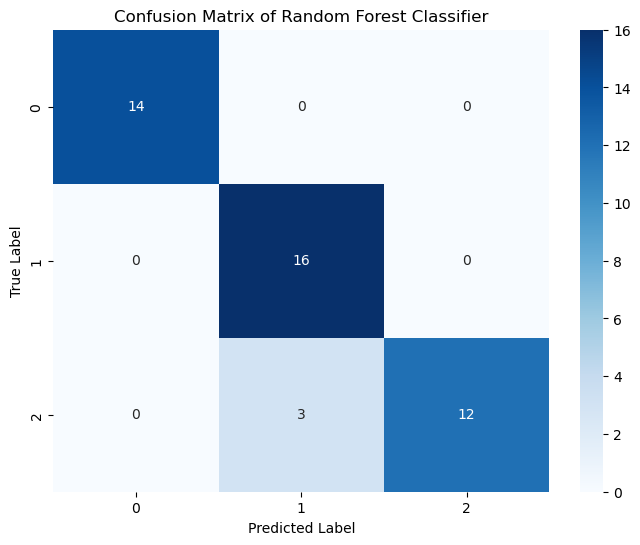

In [98]:
Y = iris_df['target']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Random Forest Classifier')
plt.show()

In [99]:
print(precision_score(y_test, y_pred, average='micro'))
print(recall_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='micro'))

0.9333333333333333
0.9333333333333333
0.9333333333333333


In [100]:
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

0.9473684210526315
0.9333333333333332
0.9343915343915343


In [101]:
print(precision_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average='weighted'))

0.943859649122807
0.9333333333333333
0.9324867724867725


### Кроссвалидация

In [103]:
cv_scores = cross_val_score(rfc, X, y, cv=5)
print('Cross-validation scores: ', cv_scores)
print('Mean cross-validation score: ', np.mean(cv_scores))

Cross-validation scores:  [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean cross-validation score:  0.9666666666666668


### Настройка гиперпараметров

In [104]:
param_grid = {'max_depth': [1,2,3,4,5]}

rfc = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'max_depth': 1}


In [105]:
rfc = RandomForestClassifier(max_depth = 1)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=1)

In [106]:
y_pred = rfc.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1,
       1, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2,
       2])

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      0.88      0.90        16
           2       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



## Общий вывод 

In [163]:
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier", "Logistic Regression"]

log_cols = ["Classifier", "Accuracy", "Precision", "Recall", "F1"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_ac, gnb_ac, rfc_ac, lr_ac]
log["Precision"] = [knn_precision, gnb_precision, rfc_precision, lr_precision]
log["Recall"] = [knn_recall, gnb_recall, rfc_recall, lr_recall]
log["F1"] = [knn_f1, gnb_f1, rfc_f1, lr_f1]

In [164]:
log

,Classifier,Accuracy,Precision,Recall,F1
0,KNeighborsClassifier,0.933333,0.936975,0.934722,0.935214
1,Gaussian Naive Bayes,0.933333,0.947368,0.933333,0.934392
2,Random Forest Classifier,0.933333,0.947368,0.933333,0.934392
3,Logistic Regression,0.933333,0.947368,0.933333,0.934392


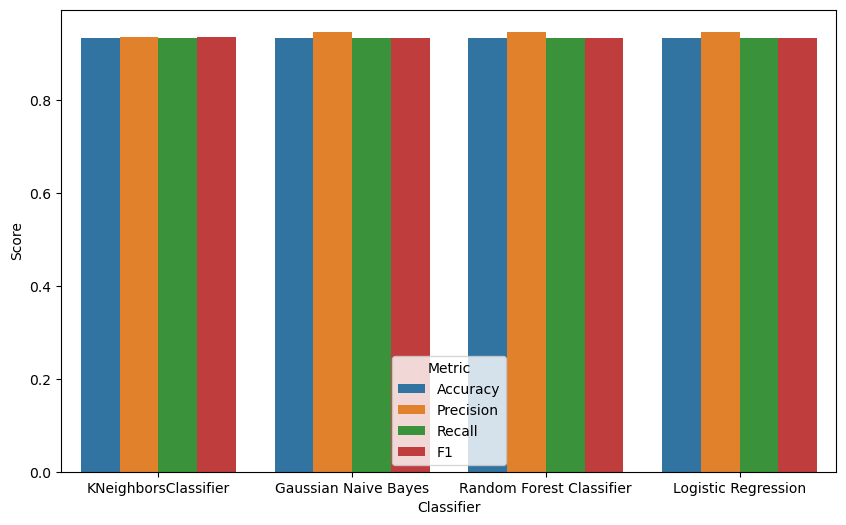

In [167]:
log_melted = log.melt(id_vars='Classifier', var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(data=log_melted, x='Classifier', y='Score', hue='Metric')
plt.show()